In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import boxcox

from sklearn.metrics import accuracy_score, confusion_matrix, multilabel_confusion_matrix, classification_report

import pickle

import warnings
warnings.filterwarnings('ignore')

# Problem Statement

# Data Gathering

In [2]:
df = pd.read_csv('Obesity_Level_Prediction.csv')
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df.describe(include = 'all')

Gender          Age       Height       Weight  \
count    2111  2111.000000  2111.000000  2111.000000   
unique      2          NaN          NaN          NaN   
top      Male          NaN          NaN          NaN   
freq     1068          NaN          NaN          NaN   
mean      NaN    24.312600     1.701677    86.586058   
std       NaN     6.345968     0.093305    26.191172   
min       NaN    14.000000     1.450000    39.000000   
25%       NaN    19.947192     1.630000    65.473343   
50%       NaN    22.777890     1.700499    83.000000   
75%       NaN    26.000000     1.768464   107.430682   
max       NaN    61.000000     1.980000   173.000000   

       family_history_with_overweight  FAVC         FCVC          NCP  \
count                            2111  2111  2111.000000  2111.000000   
unique                              2     2          NaN          NaN   
top                               yes   yes          NaN          NaN   
freq                             1726  1866          NaN          NaN   
mean                              NaN   NaN     2.419043     2.685628   
std                               NaN   NaN     0.533927     0.778039   
min                               NaN   NaN     1.000000     1.000000   
25%                               NaN   NaN     2.000000     2.658738   
50%                               NaN   NaN     2.385502     3.000000   
75%                               NaN   NaN     3.000000     3.000000   
max                               NaN   NaN     3.000000     4.000000   

             CAEC SMOKE         CH2O   SCC          FAF          TUE  \
count        2111  2111  2111.000000  2111  2111.000000  2111.000000   
unique          4     2          NaN     2          NaN          NaN   
top     Sometimes    no          NaN    no          NaN          NaN   
freq         1765  2067          NaN  2015          NaN          NaN   
mean          NaN   NaN     2.008011   NaN     1.010298     0.657866   
std           NaN   NaN     0.612953   NaN     0.850592     0.608927   
min           NaN   NaN     1.000000   NaN     0.000000     0.000000   
25%           NaN   NaN     1.584812   NaN     0.124505     0.000000   
50%           NaN   NaN     2.000000   NaN     1.000000     0.625350   
75%           NaN   NaN     2.477420   NaN     1.666678     1.000000   
max           NaN   NaN     3.000000   NaN     3.000000     2.000000   

             CALC                 MTRANS      NObeyesdad  
count        2111                   2111            2111  
unique          4                      5               7  
top     Sometimes  Public_Transportation  Obesity_Type_I  
freq         1401                   1580             351  
mean          NaN                    NaN             NaN  
std           NaN                    NaN             NaN  
min           NaN                    NaN             NaN  
25%           NaN                    NaN             NaN  
50%           NaN                    NaN             NaN  
75%           NaN                    NaN             NaN  
max           NaN                    NaN             NaN

# Exploratory Data Analysis (EDA)

In [5]:
sns.pairplot(df, hue = 'NObeyesdad')

### 1) Gender

In [6]:
df['Gender']

0       Female
1       Female
2         Male
3         Male
4         Male
         ...  
2106    Female
2107    Female
2108    Female
2109    Female
2110    Female
Name: Gender, Length: 2111, dtype: object

In [7]:
df['Gender'].isna().sum()     # Checking for null values

0

In [8]:
df['Gender'].unique()     # Checking unique values

array(['Female', 'Male'], dtype=object)

<AxesSubplot:xlabel='Gender', ylabel='count'>

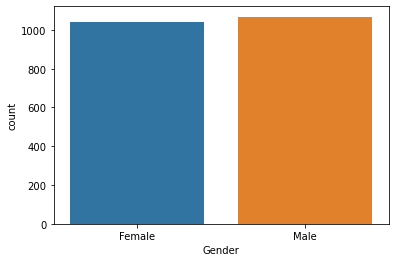

In [9]:
sns.countplot(x = df['Gender'])

In [10]:
# It contains null vallues and also it requires encoding technique to apply

### 2) Age

In [11]:
df['Age']

0       21.000000
1       21.000000
2       23.000000
3       27.000000
4       22.000000
          ...    
2106    20.976842
2107    21.982942
2108    22.524036
2109    24.361936
2110    23.664709
Name: Age, Length: 2111, dtype: float64

In [12]:
df['Age'].isna().sum()     # Checking for null values

0

In [13]:
# This feature does not contain any null values 

#### Detecting Outliers

In [14]:
sns.kdeplot(x = df['Age'], fill = True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

In [15]:
# Finding out outliers using zscore method

In [16]:
def get_outliers(column):
    
    outliers_list = []
    mean = column.mean()
    std = column.std()
    threshold = 3
    
    for i in column.values:
        zscore = (i - mean)/std
        
        if np.abs(zscore) > threshold:
            outliers_list.append(i)
            
    return outliers_list

In [17]:
get_outliers(df['Age'])

[52.0,
 55.0,
 61.0,
 44.0,
 55.0,
 45.0,
 51.0,
 56.0,
 45.0,
 55.24625,
 50.832559,
 45.0,
 55.137881,
 46.491859,
 55.022494,
 47.7061,
 45.821267,
 43.604901,
 43.510672,
 47.283374,
 43.591999,
 43.719395,
 43.37634,
 43.726081]

<AxesSubplot:xlabel='Age'>

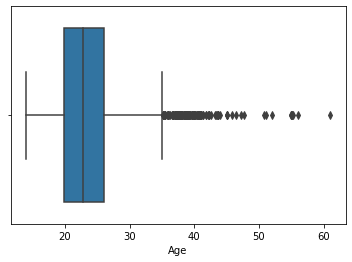

In [18]:
sns.boxplot(x = df['Age'])

In [19]:
# iqr (Interquantile Method) method

In [20]:
q1 = df['Age'].quantile(0.25)
q2 = df['Age'].quantile(0.50)
q3 = df['Age'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper tail :",upper_tail)
print("Lower tail :",lower_tail)

Upper tail : 35.079212
Lower tail : 10.867980000000003


In [21]:
# Checking Skewness

In [22]:
df['Age'].skew()

1.529100353758853

In [23]:
# Highly Positively Skewed 

In [24]:
# We can see outliers here so we need to reduce the impact of these outliers using some transformation technique

### 3) Height

In [25]:
df['Height']

0       1.620000
1       1.520000
2       1.800000
3       1.800000
4       1.780000
          ...   
2106    1.710730
2107    1.748584
2108    1.752206
2109    1.739450
2110    1.738836
Name: Height, Length: 2111, dtype: float64

In [26]:
df['Height'].isna().sum()     # Checking for null values

0

In [27]:
# This feature does not contain any null values 

#### Detecting Outliers

In [28]:
sns.kdeplot(x = df['Height'], fill = True)

<AxesSubplot:xlabel='Height', ylabel='Density'>

In [29]:
# Finding out outliers using zscore method

In [30]:
get_outliers(df['Height'])

[]

<AxesSubplot:xlabel='Height'>

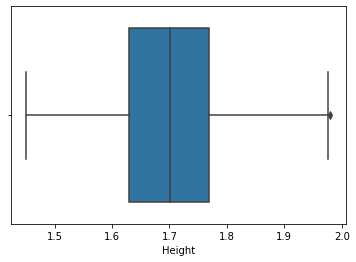

In [31]:
sns.boxplot(x = df['Height'])

In [32]:
# iqr (Interquantile Method) method

In [33]:
q1 = df['Height'].quantile(0.25)
q2 = df['Height'].quantile(0.50)
q3 = df['Height'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper tail :",upper_tail)
print("Lower tail :",lower_tail)

Upper tail : 1.9761600000000001
Lower tail : 1.4223039999999996


In [34]:
# Checking Skewness

In [35]:
df['Height'].skew()

-0.012854646457936172

In [36]:
# No Skew : Symmetricl Distribution (Withion the range of -0.5 to +0.5)

In [37]:
# We dont see any outliers here as the minimum and maximum values are within the upper and lower tail

### 4) Weight

In [38]:
df['Weight']

0        64.000000
1        56.000000
2        77.000000
3        87.000000
4        89.800000
           ...    
2106    131.408528
2107    133.742943
2108    133.689352
2109    133.346641
2110    133.472641
Name: Weight, Length: 2111, dtype: float64

In [39]:
df['Weight'].isna().sum()     # Checking for null values

0

In [40]:
# This feature does not contain any null values 

### Detecting Outliers

In [41]:
sns.kdeplot(x = df['Weight'], fill = True)

<AxesSubplot:xlabel='Weight', ylabel='Density'>

In [42]:
# Finding out outliers using zscore method

In [43]:
get_outliers(df['Weight'])

[173.0]

<AxesSubplot:xlabel='Weight'>

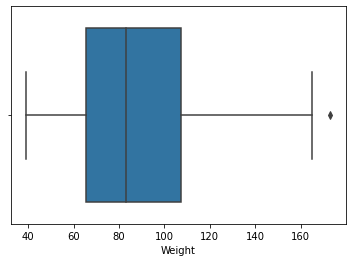

In [44]:
sns.boxplot(x = df['Weight'])

In [45]:
# iqr (Interquantile Method) method

In [46]:
q1 = df['Weight'].quantile(0.25)
q2 = df['Weight'].quantile(0.50)
q3 = df['Weight'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper tail :",upper_tail)
print("Lower tail :",lower_tail)

Upper tail : 170.3666905
Lower tail : 2.537334499999993


In [47]:
# Checking Skewness

In [48]:
df['Weight'].skew()     

0.2554104953556746

In [49]:
# No Skew : Symmetricl Distribution (Withion the range of -0.5 to +0.5)

In [50]:
# We see only one outlier in this feature and which is already near to upper tail so dont need 
# any outlier handling technique here

### 5) family_history_with_overweight

In [51]:
df['family_history_with_overweight']

0       yes
1       yes
2       yes
3        no
4        no
       ... 
2106    yes
2107    yes
2108    yes
2109    yes
2110    yes
Name: family_history_with_overweight, Length: 2111, dtype: object

In [52]:
df['family_history_with_overweight'].isna().sum()     # Checking for null values

0

In [53]:
df['family_history_with_overweight'].unique()     # Checking unique values

array(['yes', 'no'], dtype=object)

<AxesSubplot:xlabel='family_history_with_overweight', ylabel='count'>

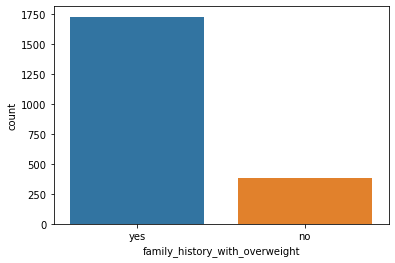

In [54]:
sns.countplot(x = df['family_history_with_overweight'])

In [55]:
# We dont see any null value here but this feature needs to apply encoding

### 6) FAVC

In [56]:
# FAVC : This feature says, Do you eat high caloric food frequently?

In [57]:
df['FAVC']

0        no
1        no
2        no
3        no
4        no
       ... 
2106    yes
2107    yes
2108    yes
2109    yes
2110    yes
Name: FAVC, Length: 2111, dtype: object

In [58]:
df['FAVC'].isna().sum()     # Checking for null values

0

In [59]:
df['FAVC'].unique()     # Checking unique values

array(['no', 'yes'], dtype=object)

<AxesSubplot:xlabel='FAVC', ylabel='count'>

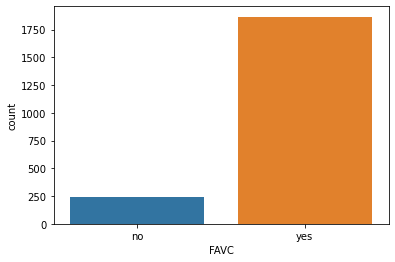

In [60]:
sns.countplot(x = df['FAVC'])

In [61]:
# We dont see any null value here but this feature needs to apply encoding

### 7) FCVC

In [62]:
# FCVC : This feature says, Do you usually eat vegetables in your meals?

In [63]:
df['FCVC']

0       2.0
1       3.0
2       2.0
3       3.0
4       2.0
       ... 
2106    3.0
2107    3.0
2108    3.0
2109    3.0
2110    3.0
Name: FCVC, Length: 2111, dtype: float64

In [64]:
df['FCVC'].isna().sum()     # Checking for null values

0

In [65]:
# This feature does not contain any null values 

#### Detecting Outliers

<AxesSubplot:xlabel='FCVC', ylabel='Density'>

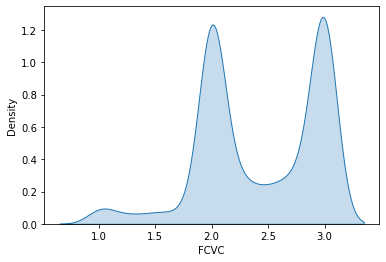

In [66]:
sns.kdeplot(x = df['FCVC'], fill = True)

In [67]:
# Finding out outliers using zscore method

In [68]:
get_outliers(df['FCVC'])

[]

<AxesSubplot:xlabel='FCVC'>

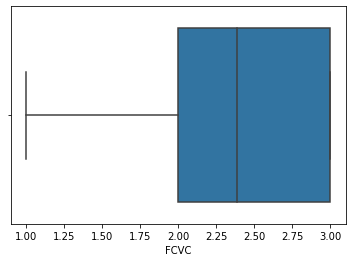

In [69]:
sns.boxplot(x = df['FCVC'])

In [70]:
# iqr (Interquantile Method) method

In [71]:
q1 = df['FCVC'].quantile(0.25)
q2 = df['FCVC'].quantile(0.50)
q3 = df['FCVC'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper tail :",upper_tail)
print("Lower tail :",lower_tail)

Upper tail : 4.5
Lower tail : 0.5


In [72]:
# Checking Skewness

In [73]:
df['FCVC'].skew()

-0.4329058314318413

In [74]:
# No Skew : Symmetricl Distribution (Withion the range of -0.5 to +0.5)

In [75]:
# We dont see any outliers here as the minimum and maximum values are within the upper and lower tail

### 8) NCP

In [76]:
# NCP : This feature says, How many main meals do you have daily?

In [77]:
df['NCP']

0       3.0
1       3.0
2       3.0
3       3.0
4       1.0
       ... 
2106    3.0
2107    3.0
2108    3.0
2109    3.0
2110    3.0
Name: NCP, Length: 2111, dtype: float64

In [78]:
df['NCP'].isna().sum()

0

In [79]:
# This feature does not contain any null values 

#### Detecting Outliers

<AxesSubplot:xlabel='NCP', ylabel='Density'>

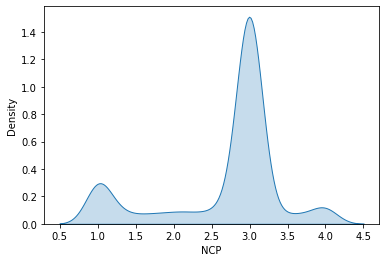

In [80]:
sns.kdeplot(x = df['NCP'], fill = True)

In [81]:
# Finding out outliers using zscore method

In [82]:
get_outliers(df['NCP'])

[]

In [83]:
sns.boxplot(x = df['NCP'])

<AxesSubplot:xlabel='NCP'>

In [84]:
# iqr (Interquantile Method) method

In [85]:
q1 = df['NCP'].quantile(0.25)
q2 = df['NCP'].quantile(0.50)
q3 = df['NCP'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper tail :",upper_tail)
print("Lower tail :",lower_tail)

Upper tail : 3.5118929999999997
Lower tail : 2.146845


In [86]:
# Checking Skewness

In [87]:
df['NCP'].skew()

-1.1070972671361423

In [88]:
# Highly Negatively Skewed

In [89]:
# We can see outliers here so we need to reduce the impact of these outliers using some transformation technique

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### 9) CAEC

In [91]:
# CAEC : This feature says, Do you eat any food between meals?

In [92]:
df['CAEC']

0       Sometimes
1       Sometimes
2       Sometimes
3       Sometimes
4       Sometimes
          ...    
2106    Sometimes
2107    Sometimes
2108    Sometimes
2109    Sometimes
2110    Sometimes
Name: CAEC, Length: 2111, dtype: object

In [93]:
df['CAEC'].isna().sum()     # Checking for null values

0

In [94]:
df['CAEC'].unique()     # Checking unique values

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [95]:
sns.countplot(x = df['CAEC'])

<AxesSubplot:xlabel='CAEC', ylabel='count'>

In [96]:
# We dont see any null value here but this feature needs to apply encoding

### 10) SMOKE

In [97]:
# SMOKE : This feature says, Do you smoke?

In [98]:
df['SMOKE']

0        no
1       yes
2        no
3        no
4        no
       ... 
2106     no
2107     no
2108     no
2109     no
2110     no
Name: SMOKE, Length: 2111, dtype: object

In [99]:
df['SMOKE'].isna().sum()     # Checking for null values

0

In [100]:
df['SMOKE'].unique()     # Checking unique values

array(['no', 'yes'], dtype=object)

<AxesSubplot:xlabel='SMOKE', ylabel='count'>

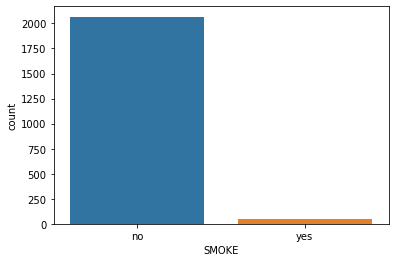

In [101]:
sns.countplot(x = df['SMOKE'])

In [102]:
# We dont see any null value here but this feature needs to apply encoding

### 11) CH2O

In [103]:
# CH2O : This feature says, How much water do you drink daily?

In [104]:
df['CH2O']

0       2.000000
1       3.000000
2       2.000000
3       2.000000
4       2.000000
          ...   
2106    1.728139
2107    2.005130
2108    2.054193
2109    2.852339
2110    2.863513
Name: CH2O, Length: 2111, dtype: float64

In [105]:
df['CH2O'].isna().sum()

0

In [106]:
# This feature does not contain any null values 

#### Detecting Outliers

<AxesSubplot:xlabel='CH2O', ylabel='Density'>

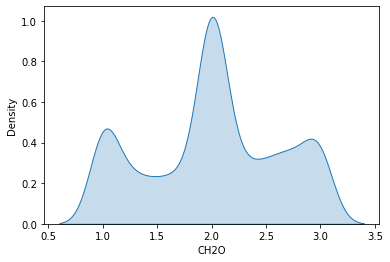

In [107]:
sns.kdeplot(x = df['CH2O'], fill = True)

In [108]:
# Finding out outliers using zscore method

In [109]:
get_outliers(df['CH2O'])

[]

<AxesSubplot:xlabel='CH2O'>

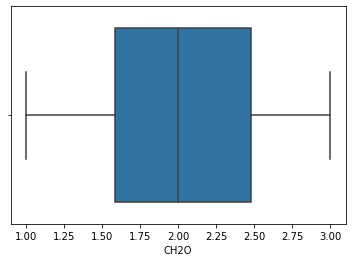

In [110]:
sns.boxplot(x = df['CH2O'])

In [111]:
# iqr (Interquantile Method) method

In [112]:
q1 = df['CH2O'].quantile(0.25)
q2 = df['CH2O'].quantile(0.50)
q3 = df['CH2O'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper tail :",upper_tail)
print("Lower tail :",lower_tail)

Upper tail : 3.81633125
Lower tail : 0.24590124999999996


In [113]:
# Checking Skewness

In [114]:
df['CH2O'].skew()

-0.10491164486824152

In [115]:
# No Skew : Symmetricl Distribution (Withion the range of -0.5 to +0.5)

In [116]:
# We dont see any outliers here as the minimum and maximum values are within the upper and lower tail

### 12) SCC

In [117]:
# SCC : This feature says, Do you monitor the calories you eat daily?

In [118]:
df['SCC']

0        no
1       yes
2        no
3        no
4        no
       ... 
2106     no
2107     no
2108     no
2109     no
2110     no
Name: SCC, Length: 2111, dtype: object

In [119]:
df['SCC'].isna().sum()     # Checking for null values

0

In [120]:
df['SCC'].unique()     # Checking unique values

array(['no', 'yes'], dtype=object)

<AxesSubplot:xlabel='SCC', ylabel='count'>

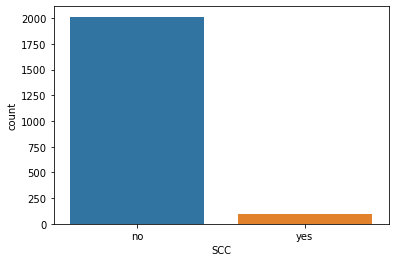

In [121]:
sns.countplot(x = df['SCC'])

In [122]:
# We dont see any null value here but this feature needs to apply encoding

### 13) FAF

In [123]:
# FAF : This feature says, How often do you have physical activity?

In [124]:
df['FAF']

0       0.000000
1       3.000000
2       2.000000
3       2.000000
4       0.000000
          ...   
2106    1.676269
2107    1.341390
2108    1.414209
2109    1.139107
2110    1.026452
Name: FAF, Length: 2111, dtype: float64

In [125]:
df['FAF'].isna().sum()     # Checking for null values

0

In [126]:
# This feature does not contain any null values 

#### Detecting Outliers

<AxesSubplot:xlabel='FAF', ylabel='Density'>

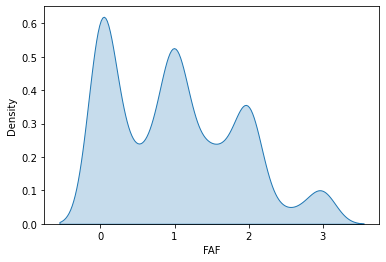

In [127]:
sns.kdeplot(x = df['FAF'], fill = True)

In [128]:
# Finding out outliers using zscore method

In [129]:
get_outliers(df['FAF'])

[]

<AxesSubplot:xlabel='FAF'>

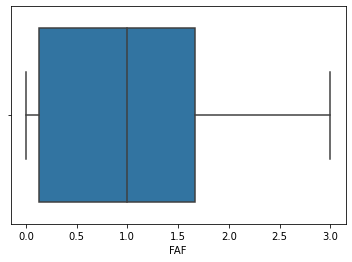

In [130]:
sns.boxplot(x = df['FAF'])

In [131]:
# iqr (Interquantile Method) method

In [132]:
q1 = df['FAF'].quantile(0.25)
q2 = df['FAF'].quantile(0.50)
q3 = df['FAF'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper tail :",upper_tail)
print("Lower tail :",lower_tail)

Upper tail : 3.97993625
Lower tail : -2.18875375


In [133]:
# Checking Skewness

In [134]:
df['FAF'].skew()

0.49848961466299796

In [135]:
# No Skew : Symmetricl Distribution (Withion the range of -0.5 to +0.5)

In [136]:
# We dont see any outliers here as the minimum and maximum values are within the upper and lower tail

### 14) TUE

In [137]:
# TUE : This feature says, How much time do you use technological devices such as cell phone, 
# videogames, television, computer and others?

In [138]:
df['TUE']

0       1.000000
1       0.000000
2       1.000000
3       0.000000
4       0.000000
          ...   
2106    0.906247
2107    0.599270
2108    0.646288
2109    0.586035
2110    0.714137
Name: TUE, Length: 2111, dtype: float64

In [139]:
df['TUE'].isna().sum()     # Checking for null values

0

In [140]:
# This feature does not contain any null values 

#### Detecting Outliers

<AxesSubplot:xlabel='TUE', ylabel='Density'>

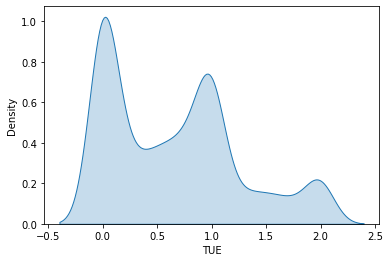

In [141]:
sns.kdeplot(x = df['TUE'], fill = True)

In [142]:
# Finding out outliers using zscore method

In [143]:
get_outliers(df['TUE'])

[]

<AxesSubplot:xlabel='TUE'>

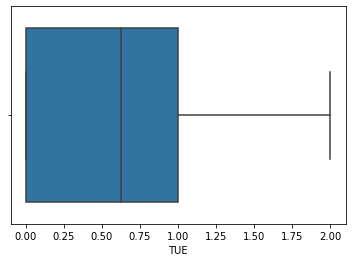

In [144]:
sns.boxplot(x = df['TUE'])

In [145]:
# iqr (Interquantile Method) method

In [146]:
q1 = df['TUE'].quantile(0.25)
q2 = df['TUE'].quantile(0.50)
q3 = df['TUE'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper tail :",upper_tail)
print("Lower tail :",lower_tail)

Upper tail : 2.5
Lower tail : -1.5


In [147]:
# Checking Skewness

In [148]:
df['TUE'].skew()

0.6185024143058271

In [149]:
# No Skew : Symmetricl Distribution Withion the range of -0.5 to +0.5 (Nearly to the range)

In [150]:
# We dont see any outliers here as the minimum and maximum values are within the upper and lower tail

### 15) CALC

In [151]:
# CALC : This feature says, How often do you drink alcohol?

In [152]:
df['CALC']

0               no
1        Sometimes
2       Frequently
3       Frequently
4        Sometimes
           ...    
2106     Sometimes
2107     Sometimes
2108     Sometimes
2109     Sometimes
2110     Sometimes
Name: CALC, Length: 2111, dtype: object

In [153]:
df['CALC'].isna().sum()     # Checking for null values

0

In [154]:
df['CALC'].unique()     # Checking unique values

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

<AxesSubplot:xlabel='CALC', ylabel='count'>

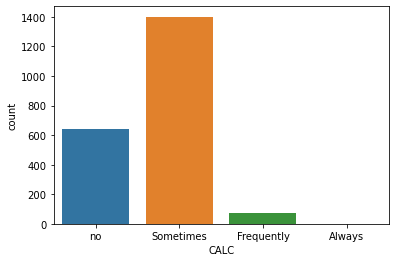

In [155]:
sns.countplot(x = df['CALC'])

In [156]:
# We dont see any null value here but this feature needs to apply encoding

### 16) MTRANS

In [157]:
# MTRANS : This feature says, Which transportation do you usually use?

In [158]:
df['MTRANS']

0       Public_Transportation
1       Public_Transportation
2       Public_Transportation
3                     Walking
4       Public_Transportation
                ...          
2106    Public_Transportation
2107    Public_Transportation
2108    Public_Transportation
2109    Public_Transportation
2110    Public_Transportation
Name: MTRANS, Length: 2111, dtype: object

In [159]:
df['MTRANS'].isna().sum()     # Checking for null values

0

In [160]:
df['MTRANS'].unique()     # Checking unique values

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [161]:
sns.countplot(x = df['MTRANS'])

<AxesSubplot:xlabel='MTRANS', ylabel='count'>

In [162]:
# We dont see any null value here but this feature needs to apply encoding

### 17) NObeyesdad

In [163]:
# NObeyesdad : This is our Target Variable which tell us about the Obesity level

In [164]:
df['NObeyesdad']

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [165]:
df['NObeyesdad'].isna().sum()     # Checking for null values

0

In [166]:
df['NObeyesdad'].unique()     # Checking unique values

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

<AxesSubplot:xlabel='NObeyesdad', ylabel='count'>

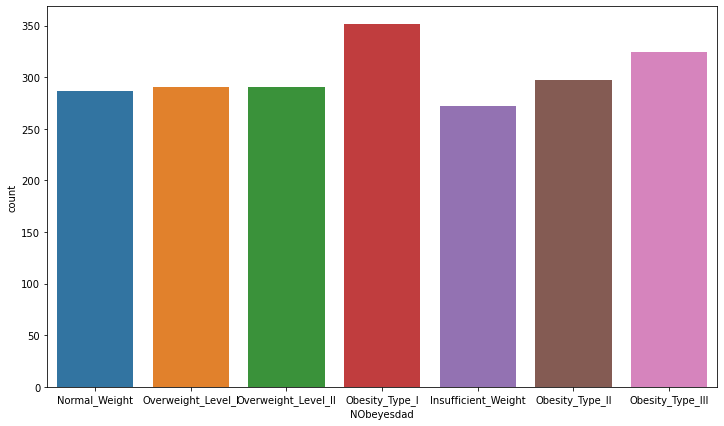

In [167]:
plt.figure(figsize = (12,7))
sns.countplot(x = df['NObeyesdad'])

In [168]:
# We dont see any null value here but this feature needs to apply encoding

# Feature Engineering

### 1) Encoding the feature df['Gender']

In [169]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [170]:
df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})

In [171]:
df

Gender        Age    Height      Weight family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                            yes   
1          0  21.000000  1.520000   56.000000                            yes   
2          1  23.000000  1.800000   77.000000                            yes   
3          1  27.000000  1.800000   87.000000                             no   
4          1  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106       0  20.976842  1.710730  131.408528                            yes   
2107       0  21.982942  1.748584  133.742943                            yes   
2108       0  22.524036  1.752206  133.689352                            yes   
2109       0  24.361936  1.739450  133.346641                            yes   
2110       0  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

### 2) Handling Outliers present in df['Age']

<AxesSubplot:xlabel='Age'>

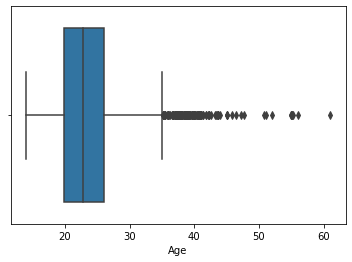

In [172]:
sns.boxplot(x = df['Age'])

<AxesSubplot:xlabel='Age'>

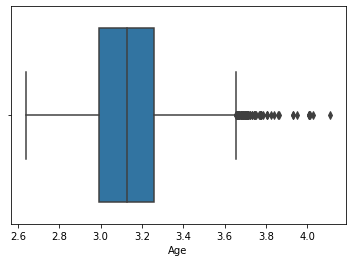

In [173]:
sns.boxplot(x = np.log(df['Age']))

In [174]:
sns.boxplot(x = np.sqrt(df['Age']))

<AxesSubplot:xlabel='Age'>

In [175]:
sns.boxplot(x = np.cbrt(df['Age']))

<AxesSubplot:xlabel='Age'>

In [176]:
sns.boxplot(x = boxcox(df['Age'])[0])

<AxesSubplot:>

In [177]:
sns.boxplot(x = 1/(df['Age']))

<AxesSubplot:xlabel='Age'>

In [178]:
# Applying boxcox transformation to this feature

In [179]:
df['Age'], boxcox_lambda_val_age = boxcox(df['Age'])

In [180]:
df['Age']

0       0.641058
1       0.641058
2       0.641825
3       0.642940
4       0.641464
          ...   
2106    0.641048
2107    0.641457
2108    0.641658
2109    0.642257
2110    0.642044
Name: Age, Length: 2111, dtype: float64

In [181]:
sns.boxplot(x = df['Age'])

<AxesSubplot:xlabel='Age'>

In [182]:
# Checking Skew

In [183]:
df['Age'].skew()

0.08682230397804826

In [184]:
# No Skew : Symmetricl Distributiona

In [185]:
# Now our feature lookslike balanced comparing before one

### 3) Encoding the feature df['family_history_with_overweight']

In [186]:
df['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [187]:
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'yes':1, 'no':0})

In [188]:
df

Gender       Age    Height      Weight  family_history_with_overweight  \
0          0  0.641058  1.620000   64.000000                               1   
1          0  0.641058  1.520000   56.000000                               1   
2          1  0.641825  1.800000   77.000000                               1   
3          1  0.642940  1.800000   87.000000                               0   
4          1  0.641464  1.780000   89.800000                               0   
...      ...       ...       ...         ...                             ...   
2106       0  0.641048  1.710730  131.408528                               1   
2107       0  0.641457  1.748584  133.742943                               1   
2108       0  0.641658  1.752206  133.689352                               1   
2109       0  0.642257  1.739450  133.346641                               1   
2110       0  0.642044  1.738836  133.472641                               1   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

### 4) Encoding the feature df['FAVC']

In [189]:
df['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [190]:
df['FAVC'] = df['FAVC'].replace({'no':0, 'yes':1})

In [191]:
df

Gender       Age    Height      Weight  family_history_with_overweight  \
0          0  0.641058  1.620000   64.000000                               1   
1          0  0.641058  1.520000   56.000000                               1   
2          1  0.641825  1.800000   77.000000                               1   
3          1  0.642940  1.800000   87.000000                               0   
4          1  0.641464  1.780000   89.800000                               0   
...      ...       ...       ...         ...                             ...   
2106       0  0.641048  1.710730  131.408528                               1   
2107       0  0.641457  1.748584  133.742943                               1   
2108       0  0.641658  1.752206  133.689352                               1   
2109       0  0.642257  1.739450  133.346641                               1   
2110       0  0.642044  1.738836  133.472641                               1   

      FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0        0   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1        0   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2        0   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3        0   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4        0   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...    ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106     1   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107     1   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108     1   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109     1   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110     1   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

### 5) Handling outliers present in df['NCP']

In [192]:
sns.boxplot(x = df['NCP'])

<AxesSubplot:xlabel='NCP'>

<AxesSubplot:xlabel='NCP'>

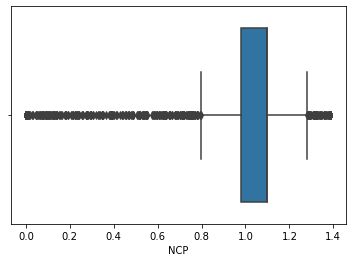

In [193]:
sns.boxplot(x = np.log(df['NCP']))

<AxesSubplot:xlabel='NCP'>

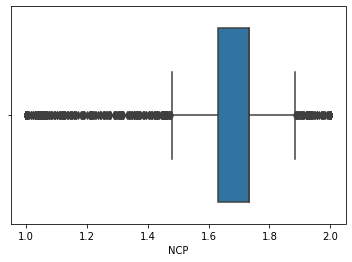

In [194]:
sns.boxplot(x = np.sqrt(df['NCP']))

<AxesSubplot:xlabel='NCP'>

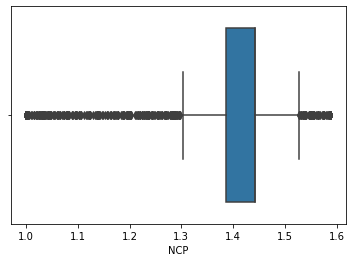

In [195]:
sns.boxplot(x = np.cbrt(df['NCP']))

<AxesSubplot:>

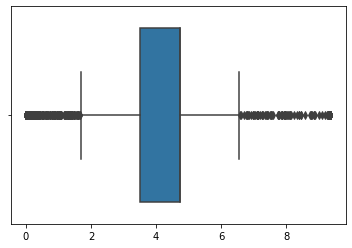

In [196]:
sns.boxplot(x = boxcox(df['NCP'])[0])

<AxesSubplot:xlabel='NCP'>

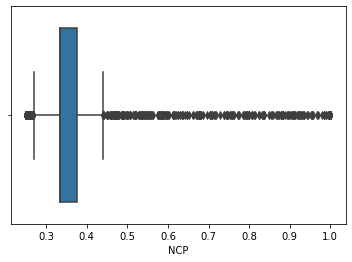

In [197]:
sns.boxplot(x = 1/(df['NCP']))

In [198]:
# Applying boxcox transformation to this feature

In [199]:
df['NCP'], boxcox_lambda_val_NCP = boxcox(df['NCP'])

<AxesSubplot:xlabel='NCP'>

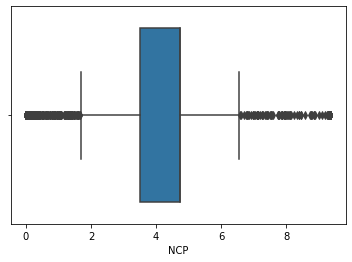

In [200]:
sns.boxplot(df['NCP'])

In [201]:
# Checking Skew

In [202]:
df['NCP'].skew()

-0.2198257450980814

In [203]:
# No Skew : Symmetricl Distributiona

In [204]:
# Now our feature lookslike balanced comparing before one

### 6) Encoding the feature df['CAEC']

In [205]:
df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [206]:
df['CAEC'].replace({'Sometimes':0, 'Frequently':1, 'Always':2, 'no':3}, inplace = True)

In [207]:
df

Gender       Age    Height      Weight  family_history_with_overweight  \
0          0  0.641058  1.620000   64.000000                               1   
1          0  0.641058  1.520000   56.000000                               1   
2          1  0.641825  1.800000   77.000000                               1   
3          1  0.642940  1.800000   87.000000                               0   
4          1  0.641464  1.780000   89.800000                               0   
...      ...       ...       ...         ...                             ...   
2106       0  0.641048  1.710730  131.408528                               1   
2107       0  0.641457  1.748584  133.742943                               1   
2108       0  0.641658  1.752206  133.689352                               1   
2109       0  0.642257  1.739450  133.346641                               1   
2110       0  0.642044  1.738836  133.472641                               1   

      FAVC  FCVC       NCP  CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0        0   2.0  4.723647     0    no  2.000000   no  0.000000  1.000000   
1        0   3.0  4.723647     0   yes  3.000000  yes  3.000000  0.000000   
2        0   2.0  4.723647     0    no  2.000000   no  2.000000  1.000000   
3        0   3.0  4.723647     0    no  2.000000   no  2.000000  0.000000   
4        0   2.0  0.000000     0    no  2.000000   no  0.000000  0.000000   
...    ...   ...       ...   ...   ...       ...  ...       ...       ...   
2106     1   3.0  4.723647     0    no  1.728139   no  1.676269  0.906247   
2107     1   3.0  4.723647     0    no  2.005130   no  1.341390  0.599270   
2108     1   3.0  4.723647     0    no  2.054193   no  1.414209  0.646288   
2109     1   3.0  4.723647     0    no  2.852339   no  1.139107  0.586035   
2110     1   3.0  4.723647     0    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

### 7) Encoding the feature df['SMOKE']

In [208]:
df['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [209]:
df['SMOKE'].replace({'no':0, 'yes':1}, inplace = True)

In [210]:
df

Gender       Age    Height      Weight  family_history_with_overweight  \
0          0  0.641058  1.620000   64.000000                               1   
1          0  0.641058  1.520000   56.000000                               1   
2          1  0.641825  1.800000   77.000000                               1   
3          1  0.642940  1.800000   87.000000                               0   
4          1  0.641464  1.780000   89.800000                               0   
...      ...       ...       ...         ...                             ...   
2106       0  0.641048  1.710730  131.408528                               1   
2107       0  0.641457  1.748584  133.742943                               1   
2108       0  0.641658  1.752206  133.689352                               1   
2109       0  0.642257  1.739450  133.346641                               1   
2110       0  0.642044  1.738836  133.472641                               1   

      FAVC  FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
0        0   2.0  4.723647     0      0  2.000000   no  0.000000  1.000000   
1        0   3.0  4.723647     0      1  3.000000  yes  3.000000  0.000000   
2        0   2.0  4.723647     0      0  2.000000   no  2.000000  1.000000   
3        0   3.0  4.723647     0      0  2.000000   no  2.000000  0.000000   
4        0   2.0  0.000000     0      0  2.000000   no  0.000000  0.000000   
...    ...   ...       ...   ...    ...       ...  ...       ...       ...   
2106     1   3.0  4.723647     0      0  1.728139   no  1.676269  0.906247   
2107     1   3.0  4.723647     0      0  2.005130   no  1.341390  0.599270   
2108     1   3.0  4.723647     0      0  2.054193   no  1.414209  0.646288   
2109     1   3.0  4.723647     0      0  2.852339   no  1.139107  0.586035   
2110     1   3.0  4.723647     0      0  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

### 8) Encoding the feature df['SCC']

In [211]:
df['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [212]:
df['SCC'].replace({'no':0, 'yes':1}, inplace = True)

In [213]:
df

Gender       Age    Height      Weight  family_history_with_overweight  \
0          0  0.641058  1.620000   64.000000                               1   
1          0  0.641058  1.520000   56.000000                               1   
2          1  0.641825  1.800000   77.000000                               1   
3          1  0.642940  1.800000   87.000000                               0   
4          1  0.641464  1.780000   89.800000                               0   
...      ...       ...       ...         ...                             ...   
2106       0  0.641048  1.710730  131.408528                               1   
2107       0  0.641457  1.748584  133.742943                               1   
2108       0  0.641658  1.752206  133.689352                               1   
2109       0  0.642257  1.739450  133.346641                               1   
2110       0  0.642044  1.738836  133.472641                               1   

      FAVC  FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
0        0   2.0  4.723647     0      0  2.000000    0  0.000000  1.000000   
1        0   3.0  4.723647     0      1  3.000000    1  3.000000  0.000000   
2        0   2.0  4.723647     0      0  2.000000    0  2.000000  1.000000   
3        0   3.0  4.723647     0      0  2.000000    0  2.000000  0.000000   
4        0   2.0  0.000000     0      0  2.000000    0  0.000000  0.000000   
...    ...   ...       ...   ...    ...       ...  ...       ...       ...   
2106     1   3.0  4.723647     0      0  1.728139    0  1.676269  0.906247   
2107     1   3.0  4.723647     0      0  2.005130    0  1.341390  0.599270   
2108     1   3.0  4.723647     0      0  2.054193    0  1.414209  0.646288   
2109     1   3.0  4.723647     0      0  2.852339    0  1.139107  0.586035   
2110     1   3.0  4.723647     0      0  2.863513    0  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

### 9) Encoding the feature df['CALC']

In [214]:
df['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [215]:
df['CALC'].replace({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}, inplace = True)

In [216]:
df

Gender       Age    Height      Weight  family_history_with_overweight  \
0          0  0.641058  1.620000   64.000000                               1   
1          0  0.641058  1.520000   56.000000                               1   
2          1  0.641825  1.800000   77.000000                               1   
3          1  0.642940  1.800000   87.000000                               0   
4          1  0.641464  1.780000   89.800000                               0   
...      ...       ...       ...         ...                             ...   
2106       0  0.641048  1.710730  131.408528                               1   
2107       0  0.641457  1.748584  133.742943                               1   
2108       0  0.641658  1.752206  133.689352                               1   
2109       0  0.642257  1.739450  133.346641                               1   
2110       0  0.642044  1.738836  133.472641                               1   

      FAVC  FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
0        0   2.0  4.723647     0      0  2.000000    0  0.000000  1.000000   
1        0   3.0  4.723647     0      1  3.000000    1  3.000000  0.000000   
2        0   2.0  4.723647     0      0  2.000000    0  2.000000  1.000000   
3        0   3.0  4.723647     0      0  2.000000    0  2.000000  0.000000   
4        0   2.0  0.000000     0      0  2.000000    0  0.000000  0.000000   
...    ...   ...       ...   ...    ...       ...  ...       ...       ...   
2106     1   3.0  4.723647     0      0  1.728139    0  1.676269  0.906247   
2107     1   3.0  4.723647     0      0  2.005130    0  1.341390  0.599270   
2108     1   3.0  4.723647     0      0  2.054193    0  1.414209  0.646288   
2109     1   3.0  4.723647     0      0  2.852339    0  1.139107  0.586035   
2110     1   3.0  4.723647     0      0  2.863513    0  1.026452  0.714137   

      CALC                 MTRANS           NObeyesdad  
0        0  Public_Transportation        Normal_Weight  
1        1  Public_Transportation        Normal_Weight  
2        2  Public_Transportation        Normal_Weight  
3        2                Walking   Overweight_Level_I  
4        1  Public_Transportation  Overweight_Level_II  
...    ...                    ...                  ...  
2106     1  Public_Transportation     Obesity_Type_III  
2107     1  Public_Transportation     Obesity_Type_III  
2108     1  Public_Transportation     Obesity_Type_III  
2109     1  Public_Transportation     Obesity_Type_III  
2110     1  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

### 10) Encoding the feature df['MTRANS']

In [217]:
df['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [218]:
df['MTRANS'].replace({'Public_Transportation':0, 'Walking':1, 'Automobile':2, 'Motorbike':3, 'Bike':4}, inplace = True)

In [219]:
df

Gender       Age    Height      Weight  family_history_with_overweight  \
0          0  0.641058  1.620000   64.000000                               1   
1          0  0.641058  1.520000   56.000000                               1   
2          1  0.641825  1.800000   77.000000                               1   
3          1  0.642940  1.800000   87.000000                               0   
4          1  0.641464  1.780000   89.800000                               0   
...      ...       ...       ...         ...                             ...   
2106       0  0.641048  1.710730  131.408528                               1   
2107       0  0.641457  1.748584  133.742943                               1   
2108       0  0.641658  1.752206  133.689352                               1   
2109       0  0.642257  1.739450  133.346641                               1   
2110       0  0.642044  1.738836  133.472641                               1   

      FAVC  FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
0        0   2.0  4.723647     0      0  2.000000    0  0.000000  1.000000   
1        0   3.0  4.723647     0      1  3.000000    1  3.000000  0.000000   
2        0   2.0  4.723647     0      0  2.000000    0  2.000000  1.000000   
3        0   3.0  4.723647     0      0  2.000000    0  2.000000  0.000000   
4        0   2.0  0.000000     0      0  2.000000    0  0.000000  0.000000   
...    ...   ...       ...   ...    ...       ...  ...       ...       ...   
2106     1   3.0  4.723647     0      0  1.728139    0  1.676269  0.906247   
2107     1   3.0  4.723647     0      0  2.005130    0  1.341390  0.599270   
2108     1   3.0  4.723647     0      0  2.054193    0  1.414209  0.646288   
2109     1   3.0  4.723647     0      0  2.852339    0  1.139107  0.586035   
2110     1   3.0  4.723647     0      0  2.863513    0  1.026452  0.714137   

      CALC  MTRANS           NObeyesdad  
0        0       0        Normal_Weight  
1        1       0        Normal_Weight  
2        2       0        Normal_Weight  
3        2       1   Overweight_Level_I  
4        1       0  Overweight_Level_II  
...    ...     ...                  ...  
2106     1       0     Obesity_Type_III  
2107     1       0     Obesity_Type_III  
2108     1       0     Obesity_Type_III  
2109     1       0     Obesity_Type_III  
2110     1       0     Obesity_Type_III  

[2111 rows x 17 columns]

### 11) Encoding the feature df['NObeyesdad']

In [220]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [221]:
df['NObeyesdad'].replace({'Normal_Weight' : 0, 'Overweight_Level_I' : 1, 'Overweight_Level_II' : 2,
                          'Obesity_Type_I' : 3, 'Insufficient_Weight' : 4, 'Obesity_Type_II' : 5,
                          'Obesity_Type_III' : 6}, inplace = True)

In [222]:
df

Gender       Age    Height      Weight  family_history_with_overweight  \
0          0  0.641058  1.620000   64.000000                               1   
1          0  0.641058  1.520000   56.000000                               1   
2          1  0.641825  1.800000   77.000000                               1   
3          1  0.642940  1.800000   87.000000                               0   
4          1  0.641464  1.780000   89.800000                               0   
...      ...       ...       ...         ...                             ...   
2106       0  0.641048  1.710730  131.408528                               1   
2107       0  0.641457  1.748584  133.742943                               1   
2108       0  0.641658  1.752206  133.689352                               1   
2109       0  0.642257  1.739450  133.346641                               1   
2110       0  0.642044  1.738836  133.472641                               1   

      FAVC  FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
0        0   2.0  4.723647     0      0  2.000000    0  0.000000  1.000000   
1        0   3.0  4.723647     0      1  3.000000    1  3.000000  0.000000   
2        0   2.0  4.723647     0      0  2.000000    0  2.000000  1.000000   
3        0   3.0  4.723647     0      0  2.000000    0  2.000000  0.000000   
4        0   2.0  0.000000     0      0  2.000000    0  0.000000  0.000000   
...    ...   ...       ...   ...    ...       ...  ...       ...       ...   
2106     1   3.0  4.723647     0      0  1.728139    0  1.676269  0.906247   
2107     1   3.0  4.723647     0      0  2.005130    0  1.341390  0.599270   
2108     1   3.0  4.723647     0      0  2.054193    0  1.414209  0.646288   
2109     1   3.0  4.723647     0      0  2.852339    0  1.139107  0.586035   
2110     1   3.0  4.723647     0      0  2.863513    0  1.026452  0.714137   

      CALC  MTRANS  NObeyesdad  
0        0       0           0  
1        1       0           0  
2        2       0           0  
3        2       1           1  
4        1       0           2  
...    ...     ...         ...  
2106     1       0           6  
2107     1       0           6  
2108     1       0           6  
2109     1       0           6  
2110     1       0           6  

[2111 rows x 17 columns]

In [223]:
# We have performed all the preprocessing techniques over the dataset, now we are ready to build model

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [225]:
# Finding correlation between features

<AxesSubplot:>

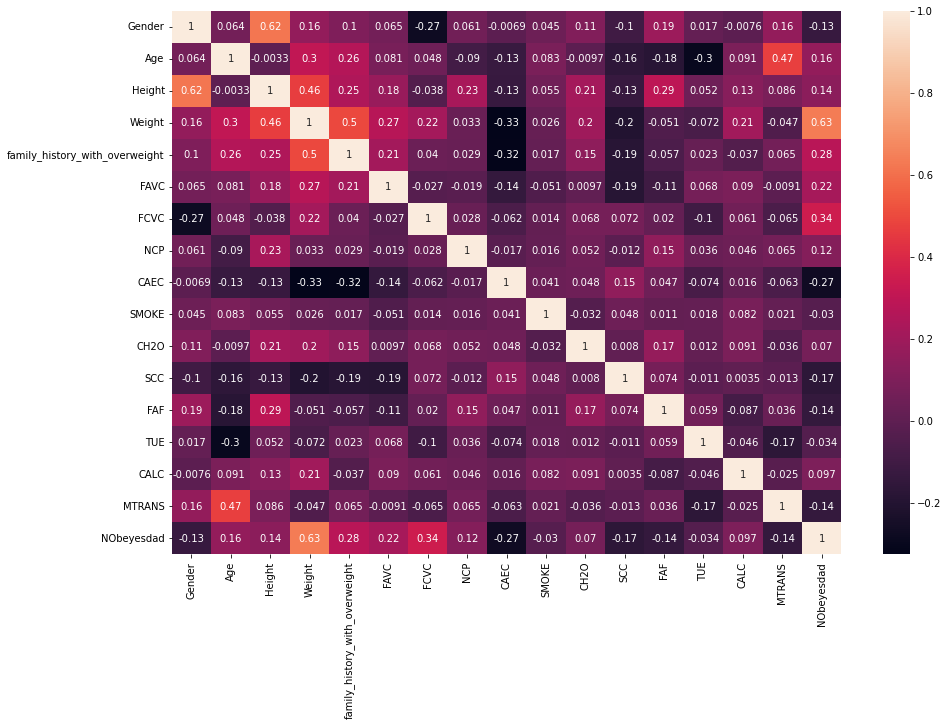

In [226]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)

### Splitting data

In [227]:
x = df.drop('NObeyesdad', axis = 1)
y = df['NObeyesdad']

In [228]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=1, stratify=y)

In [229]:
x_train

Gender       Age    Height      Weight  family_history_with_overweight  \
97         0  0.641058  1.520000   42.000000                               0   
1844       0  0.642702  1.618573  104.928643                               1   
1455       0  0.639485  1.692242   90.019501                               1   
143        0  0.644129  1.680000   75.000000                               0   
509        1  0.641571  1.753760   55.879263                               1   
...      ...       ...       ...         ...                             ...   
1259       0  0.641778  1.632118   82.000000                               1   
1169       1  0.641877  1.723072   82.338464                               1   
1015       1  0.641389  1.650000   80.000000                               1   
617        1  0.640793  1.868931   63.199726                               1   
800        0  0.639485  1.644682   68.392133                               1   

      FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF  \
97       0  3.000000  0.000000     1      0  1.000000    0  0.000000   
1844     1  3.000000  4.723647     0      0  1.698767    0  0.000000   
1455     1  2.642744  4.723647     0      0  1.904054    0  1.645654   
143      1  3.000000  0.000000     0      0  1.000000    0  0.000000   
509      1  2.450218  9.331142     0      0  2.147746    0  2.000000   
...    ...       ...       ...   ...    ...       ...  ...       ...   
1259     1  2.587789  0.628952     0      0  1.911664    0  0.000000   
1169     1  2.315932  3.504637     0      0  1.568476    0  0.949976   
1015     1  2.000000  4.723647     0      0  2.000000    0  0.826609   
617      1  3.000000  7.794821     0      0  2.825629    0  1.699592   
800      1  2.000000  0.142404     0      0  1.344539    0  0.000000   

           TUE  CALC  MTRANS  
97    0.000000     1       0  
1844  0.543960     1       0  
1455  0.363549     1       0  
143   0.000000     1       2  
509   0.589980     1       0  
...        ...   ...     ...  
1259  0.128681     1       0  
1169  0.544899     1       0  
1015  2.000000     0       0  
617   0.071028     1       2  
800   1.592570     0       0  

[1688 rows x 16 columns]

# Model Training

### 1. Logistic Regression

In [230]:
log_reg = LogisticRegression(multi_class = 'ovr')
log_reg.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [231]:
# Testing Accuracy

y_pred = log_reg.predict(x_test)

log_reg_test_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",log_reg_test_acc_score)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

multi_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("\nMultilabel Confusion Matrix :\n",multi_cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.6879432624113475

Confusion Matrix :
 [[19 13  7  7 12  0  0]
 [ 8 28 10 12  0  0  0]
 [ 0 10 25 22  0  1  0]
 [ 2  2  4 44  0 18  0]
 [ 3  0  0  0 51  0  0]
 [ 0  1  0  0  0 59  0]
 [ 0  0  0  0  0  0 65]]

Multilabel Confusion Matrix :
 [[[352  13]
  [ 39  19]]

 [[339  26]
  [ 30  28]]

 [[344  21]
  [ 33  25]]

 [[312  41]
  [ 26  44]]

 [[357  12]
  [  3  51]]

 [[344  19]
  [  1  59]]

 [[358   0]
  [  0  65]]]

Classification Report :
               precision    recall  f1-score   support

           0       0.59      0.33      0.42        58
           1       0.52      0.48      0.50        58
           2       0.54      0.43      0.48        58
           3       0.52      0.63      0.57        70
           4       0.81      0.94      0.87        54
           5       0.76      0.98      0.86        60
           6       1.00      1.00      1.00        65

    accuracy                           0.69       423
   macro avg       0.68      0.69      0.67   

In [232]:
# Training Accuracy

y_train_pred = log_reg.predict(x_train)

log_reg_train_acc_score = accuracy_score(y_train,y_train_pred)
print("Accuracy Score :",log_reg_train_acc_score)

cnf_matrix = confusion_matrix(y_train,y_train_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

multi_cnf_matrix = multilabel_confusion_matrix(y_train, y_train_pred)
print("\nMultilabel Confusion Matrix :\n",multi_cnf_matrix)

clf_report = classification_report(y_train,y_train_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.7174170616113744

Confusion Matrix :
 [[105  43  30  10  41   0   0]
 [ 26 118  34  52   0   2   0]
 [  9  34  84  92   0  13   0]
 [  2  13  12 199   0  54   1]
 [  6   0   0   0 212   0   0]
 [  0   0   0   1   0 235   1]
 [  0   0   0   0   0   1 258]]

Multilabel Confusion Matrix :
 [[[1416   43]
  [ 124  105]]

 [[1366   90]
  [ 114  118]]

 [[1380   76]
  [ 148   84]]

 [[1252  155]
  [  82  199]]

 [[1429   41]
  [   6  212]]

 [[1381   70]
  [   2  235]]

 [[1427    2]
  [   1  258]]]

Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.46      0.56       229
           1       0.57      0.51      0.54       232
           2       0.53      0.36      0.43       232
           3       0.56      0.71      0.63       281
           4       0.84      0.97      0.90       218
           5       0.77      0.99      0.87       237
           6       0.99      1.00      0.99       259

    accuracy           

### 2. K Nearest Neighbour

In [233]:
# We need to scale the data for KNN Regressor

In [234]:
norm_scaler = MinMaxScaler()
norm_array = norm_scaler.fit_transform(x_train)
x_train_norm_df = pd.DataFrame(norm_array, columns=x.columns)
# x_train_norm_df

In [235]:
norm_array = norm_scaler.transform(x_test)
x_test_norm_df = pd.DataFrame(norm_array, columns=x.columns)
# x_test_norm_df

In [236]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_norm_df,y_train)

KNeighborsClassifier()

In [237]:
# Testing Accuracy

y_pred = knn_model.predict(x_test_norm_df)

knn_test_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",knn_test_acc_score)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

multi_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("\nMultilabel Confusion Matrix :\n",multi_cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.7777777777777778

Confusion Matrix :
 [[20  6 12  6  9  5  0]
 [ 7 39  6  6  0  0  0]
 [ 2  5 47  2  0  2  0]
 [ 2  4  5 56  0  3  0]
 [ 5  0  0  1 48  0  0]
 [ 1  0  2  3  0 54  0]
 [ 0  0  0  0  0  0 65]]

Multilabel Confusion Matrix :
 [[[348  17]
  [ 38  20]]

 [[350  15]
  [ 19  39]]

 [[340  25]
  [ 11  47]]

 [[335  18]
  [ 14  56]]

 [[360   9]
  [  6  48]]

 [[353  10]
  [  6  54]]

 [[358   0]
  [  0  65]]]

Classification Report :
               precision    recall  f1-score   support

           0       0.54      0.34      0.42        58
           1       0.72      0.67      0.70        58
           2       0.65      0.81      0.72        58
           3       0.76      0.80      0.78        70
           4       0.84      0.89      0.86        54
           5       0.84      0.90      0.87        60
           6       1.00      1.00      1.00        65

    accuracy                           0.78       423
   macro avg       0.77      0.77      0.76   

In [238]:
# Training Accuracy

y_train_pred = knn_model.predict(x_train_norm_df)

knn_train_acc_score = accuracy_score(y_train,y_train_pred)
print("Accuracy Score :",knn_train_acc_score)

cnf_matrix = confusion_matrix(y_train,y_train_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

multi_cnf_matrix = multilabel_confusion_matrix(y_train, y_train_pred)
print("\nMultilabel Confusion Matrix :\n",multi_cnf_matrix)

clf_report = classification_report(y_train,y_train_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.8518957345971564

Confusion Matrix :
 [[138  23  22  13  28   4   1]
 [ 20 180  11  14   5   2   0]
 [ 11  11 192   9   4   4   1]
 [  3  11  11 244   1   9   2]
 [ 14   4   1   1 198   0   0]
 [  2   1   3   1   0 229   1]
 [  0   1   0   0   0   1 257]]

Multilabel Confusion Matrix :
 [[[1409   50]
  [  91  138]]

 [[1405   51]
  [  52  180]]

 [[1408   48]
  [  40  192]]

 [[1369   38]
  [  37  244]]

 [[1432   38]
  [  20  198]]

 [[1431   20]
  [   8  229]]

 [[1424    5]
  [   2  257]]]

Classification Report :
               precision    recall  f1-score   support

           0       0.73      0.60      0.66       229
           1       0.78      0.78      0.78       232
           2       0.80      0.83      0.81       232
           3       0.87      0.87      0.87       281
           4       0.84      0.91      0.87       218
           5       0.92      0.97      0.94       237
           6       0.98      0.99      0.99       259

    accuracy           

### Hyperparameter Tuning

In [239]:
knn_clf = KNeighborsClassifier()

hyperparameters = {'n_neighbors':np.arange(2,31), 'p':[1,2]}

rscv_knn_model = RandomizedSearchCV(knn_clf, hyperparameters, cv = 5)
rscv_knn_model.fit(x_train_norm_df, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'p': [1, 2]})

In [240]:
rscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=3, p=1)

In [241]:
knn_model_hyp = rscv_knn_model.best_estimator_
knn_model_hyp.fit(x_train_norm_df, y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [242]:
# Testing Accuracy

y_pred = knn_model_hyp.predict(x_test_norm_df)

knn_hyp_test_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",knn_hyp_test_acc_score)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

multi_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("\nMultilabel Confusion Matrix :\n",multi_cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.8392434988179669

Confusion Matrix :
 [[31  4  9  5  8  1  0]
 [ 3 45  6  3  0  1  0]
 [ 5  1 48  3  0  1  0]
 [ 2  2  5 61  0  0  0]
 [ 6  0  0  0 48  0  0]
 [ 0  0  1  2  0 57  0]
 [ 0  0  0  0  0  0 65]]

Multilabel Confusion Matrix :
 [[[349  16]
  [ 27  31]]

 [[358   7]
  [ 13  45]]

 [[344  21]
  [ 10  48]]

 [[340  13]
  [  9  61]]

 [[361   8]
  [  6  48]]

 [[360   3]
  [  3  57]]

 [[358   0]
  [  0  65]]]

Classification Report :
               precision    recall  f1-score   support

           0       0.66      0.53      0.59        58
           1       0.87      0.78      0.82        58
           2       0.70      0.83      0.76        58
           3       0.82      0.87      0.85        70
           4       0.86      0.89      0.87        54
           5       0.95      0.95      0.95        60
           6       1.00      1.00      1.00        65

    accuracy                           0.84       423
   macro avg       0.84      0.84      0.83   

In [243]:
# Training Accuracy

y_train_pred = knn_model_hyp.predict(x_train_norm_df)

knn_hyp_train_acc_score = accuracy_score(y_train,y_train_pred)
print("Accuracy Score :",knn_hyp_train_acc_score)

cnf_matrix = confusion_matrix(y_train,y_train_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

multi_cnf_matrix = multilabel_confusion_matrix(y_train, y_train_pred)
print("\nMultilabel Confusion Matrix :\n",multi_cnf_matrix)

clf_report = classification_report(y_train,y_train_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.9342417061611374

Confusion Matrix :
 [[192   8  10   7  12   0   0]
 [ 17 205   1   6   1   2   0]
 [ 10   6 211   4   1   0   0]
 [  3   3   1 273   0   1   0]
 [  9   1   0   0 208   0   0]
 [  1   0   3   1   0 231   1]
 [  0   1   1   0   0   0 257]]

Multilabel Confusion Matrix :
 [[[1419   40]
  [  37  192]]

 [[1437   19]
  [  27  205]]

 [[1440   16]
  [  21  211]]

 [[1389   18]
  [   8  273]]

 [[1456   14]
  [  10  208]]

 [[1448    3]
  [   6  231]]

 [[1428    1]
  [   2  257]]]

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       229
           1       0.92      0.88      0.90       232
           2       0.93      0.91      0.92       232
           3       0.94      0.97      0.95       281
           4       0.94      0.95      0.95       218
           5       0.99      0.97      0.98       237
           6       1.00      0.99      0.99       259

    accuracy           

### 3. Decision Tree

In [244]:
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

In [245]:
# Testing Accuracy

y_pred = dt_model.predict(x_test)

dt_test_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",dt_test_acc_score)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

multi_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("\nMultilabel Confusion Matrix :\n",multi_cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.9621749408983451

Confusion Matrix :
 [[53  4  0  0  1  0  0]
 [ 2 54  2  0  0  0  0]
 [ 0  2 56  0  0  0  0]
 [ 0  0  2 68  0  0  0]
 [ 2  0  0  0 52  0  0]
 [ 0  0  0  1  0 59  0]
 [ 0  0  0  0  0  0 65]]

Multilabel Confusion Matrix :
 [[[361   4]
  [  5  53]]

 [[359   6]
  [  4  54]]

 [[361   4]
  [  2  56]]

 [[352   1]
  [  2  68]]

 [[368   1]
  [  2  52]]

 [[363   0]
  [  1  59]]

 [[358   0]
  [  0  65]]]

Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        58
           1       0.90      0.93      0.92        58
           2       0.93      0.97      0.95        58
           3       0.99      0.97      0.98        70
           4       0.98      0.96      0.97        54
           5       1.00      0.98      0.99        60
           6       1.00      1.00      1.00        65

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96   

In [246]:
# Training Accuracy

y_train_pred = dt_model.predict(x_train)

dt_train_acc_score = accuracy_score(y_train,y_train_pred)
print("Accuracy Score :",dt_train_acc_score)

cnf_matrix = confusion_matrix(y_train,y_train_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

multi_cnf_matrix = multilabel_confusion_matrix(y_train, y_train_pred)
print("\nMultilabel Confusion Matrix :\n",multi_cnf_matrix)

clf_report = classification_report(y_train,y_train_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 1.0

Confusion Matrix :
 [[229   0   0   0   0   0   0]
 [  0 232   0   0   0   0   0]
 [  0   0 232   0   0   0   0]
 [  0   0   0 281   0   0   0]
 [  0   0   0   0 218   0   0]
 [  0   0   0   0   0 237   0]
 [  0   0   0   0   0   0 259]]

Multilabel Confusion Matrix :
 [[[1459    0]
  [   0  229]]

 [[1456    0]
  [   0  232]]

 [[1456    0]
  [   0  232]]

 [[1407    0]
  [   0  281]]

 [[1470    0]
  [   0  218]]

 [[1451    0]
  [   0  237]]

 [[1429    0]
  [   0  259]]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       232
           2       1.00      1.00      1.00       232
           3       1.00      1.00      1.00       281
           4       1.00      1.00      1.00       218
           5       1.00      1.00      1.00       237
           6       1.00      1.00      1.00       259

    accuracy                          

### Hyperparameter Tuning

In [247]:
dt_clf = DecisionTreeClassifier(random_state = 20)

hyperparameters = {'criterion' : ['gini', 'entropy'],
                   'max_depth' : np.arange(3,8),
                   'min_samples_split' : np.arange(2,20),
                   'min_samples_leaf' : np.arange(2,10)}

rscv_dt_model = RandomizedSearchCV(dt_clf, hyperparameters, cv = 5)
rscv_dt_model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=20),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [248]:
rscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=19, random_state=20)

In [249]:
dt_model_hyp = rscv_dt_model.best_estimator_
dt_model_hyp.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=19, random_state=20)

In [250]:
# Testing Accuracy

y_pred = dt_model_hyp.predict(x_test)

dt_hyp_test_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",dt_hyp_test_acc_score)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

multi_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("\nMultilabel Confusion Matrix :\n",multi_cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.9385342789598109

Confusion Matrix :
 [[50  7  0  0  1  0  0]
 [ 0 54  4  0  0  0  0]
 [ 0  4 51  3  0  0  0]
 [ 0  1  0 69  0  0  0]
 [ 5  0  0  0 49  0  0]
 [ 0  0  0  1  0 59  0]
 [ 0  0  0  0  0  0 65]]

Multilabel Confusion Matrix :
 [[[360   5]
  [  8  50]]

 [[353  12]
  [  4  54]]

 [[361   4]
  [  7  51]]

 [[349   4]
  [  1  69]]

 [[368   1]
  [  5  49]]

 [[363   0]
  [  1  59]]

 [[358   0]
  [  0  65]]]

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.86      0.88        58
           1       0.82      0.93      0.87        58
           2       0.93      0.88      0.90        58
           3       0.95      0.99      0.97        70
           4       0.98      0.91      0.94        54
           5       1.00      0.98      0.99        60
           6       1.00      1.00      1.00        65

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94   

In [251]:
# Training Accuracy

y_train_pred = dt_model_hyp.predict(x_train)

dt_hyp_train_acc_score = accuracy_score(y_train,y_train_pred)
print("Accuracy Score :",dt_hyp_train_acc_score)

cnf_matrix = confusion_matrix(y_train,y_train_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

multi_cnf_matrix = multilabel_confusion_matrix(y_train, y_train_pred)
print("\nMultilabel Confusion Matrix :\n",multi_cnf_matrix)

clf_report = classification_report(y_train,y_train_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.943127962085308

Confusion Matrix :
 [[187  34   0   0   8   0   0]
 [  1 221  10   0   0   0   0]
 [  0   8 219   5   0   0   0]
 [  0   0   5 275   0   1   0]
 [ 15   0   0   0 203   0   0]
 [  0   0   0   7   0 229   1]
 [  0   0   0   0   0   1 258]]

Multilabel Confusion Matrix :
 [[[1443   16]
  [  42  187]]

 [[1414   42]
  [  11  221]]

 [[1441   15]
  [  13  219]]

 [[1395   12]
  [   6  275]]

 [[1462    8]
  [  15  203]]

 [[1449    2]
  [   8  229]]

 [[1428    1]
  [   1  258]]]

Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.82      0.87       229
           1       0.84      0.95      0.89       232
           2       0.94      0.94      0.94       232
           3       0.96      0.98      0.97       281
           4       0.96      0.93      0.95       218
           5       0.99      0.97      0.98       237
           6       1.00      1.00      1.00       259

    accuracy            

### 4. Random Forest

In [252]:
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

In [253]:
# Testing Accuracy

y_pred = rf_model.predict(x_test)

rf_test_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",rf_test_acc_score)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

multi_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("\nMultilabel Confusion Matrix :\n",multi_cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.9385342789598109

Confusion Matrix :
 [[52  4  1  0  1  0  0]
 [ 2 52  4  0  0  0  0]
 [ 1  2 55  0  0  0  0]
 [ 0  0  6 64  0  0  0]
 [ 5  0  0  0 49  0  0]
 [ 0  0  0  0  0 60  0]
 [ 0  0  0  0  0  0 65]]

Multilabel Confusion Matrix :
 [[[357   8]
  [  6  52]]

 [[359   6]
  [  6  52]]

 [[354  11]
  [  3  55]]

 [[353   0]
  [  6  64]]

 [[368   1]
  [  5  49]]

 [[363   0]
  [  0  60]]

 [[358   0]
  [  0  65]]]

Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        58
           1       0.90      0.90      0.90        58
           2       0.83      0.95      0.89        58
           3       1.00      0.91      0.96        70
           4       0.98      0.91      0.94        54
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        65

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94   

In [254]:
# Training Accuracy

y_train_pred = rf_model.predict(x_train)

rf_train_acc_score = accuracy_score(y_train,y_train_pred)
print("Accuracy Score :",rf_train_acc_score)

cnf_matrix = confusion_matrix(y_train,y_train_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

multi_cnf_matrix = multilabel_confusion_matrix(y_train, y_train_pred)
print("\nMultilabel Confusion Matrix :\n",multi_cnf_matrix)

clf_report = classification_report(y_train,y_train_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 1.0

Confusion Matrix :
 [[229   0   0   0   0   0   0]
 [  0 232   0   0   0   0   0]
 [  0   0 232   0   0   0   0]
 [  0   0   0 281   0   0   0]
 [  0   0   0   0 218   0   0]
 [  0   0   0   0   0 237   0]
 [  0   0   0   0   0   0 259]]

Multilabel Confusion Matrix :
 [[[1459    0]
  [   0  229]]

 [[1456    0]
  [   0  232]]

 [[1456    0]
  [   0  232]]

 [[1407    0]
  [   0  281]]

 [[1470    0]
  [   0  218]]

 [[1451    0]
  [   0  237]]

 [[1429    0]
  [   0  259]]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       232
           2       1.00      1.00      1.00       232
           3       1.00      1.00      1.00       281
           4       1.00      1.00      1.00       218
           5       1.00      1.00      1.00       237
           6       1.00      1.00      1.00       259

    accuracy                          

### Hyperparameter Tuning

In [255]:
rf_clf = RandomForestClassifier(random_state=1)

hyp = {'criterion' : ['gini', 'entropy'],
       'max_depth' : np.arange(2,10),
       'min_samples_split' : np.arange(2,10),
       'min_samples_leaf' : np.arange(1,10),
       'n_estimators' : np.arange(10,100)}

rscv_rf_model = RandomizedSearchCV(rf_clf, hyp, cv = 5)
rscv_rf_model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [256]:
rscv_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=5,
                       n_estimators=81, random_state=1)

In [257]:
rf_model_hyp = rscv_rf_model.best_estimator_
rf_model_hyp.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=5,
                       n_estimators=81, random_state=1)

In [258]:
# Testing Accuracy

y_pred = rf_model_hyp.predict(x_test)

rf_hyp_test_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",rf_hyp_test_acc_score)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

multi_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("\nMultilabel Confusion Matrix :\n",multi_cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.9527186761229315

Confusion Matrix :
 [[56  0  2  0  0  0  0]
 [ 0 52  6  0  0  0  0]
 [ 0  1 57  0  0  0  0]
 [ 0  1  4 65  0  0  0]
 [ 6  0  0  0 48  0  0]
 [ 0  0  0  0  0 60  0]
 [ 0  0  0  0  0  0 65]]

Multilabel Confusion Matrix :
 [[[359   6]
  [  2  56]]

 [[363   2]
  [  6  52]]

 [[353  12]
  [  1  57]]

 [[353   0]
  [  5  65]]

 [[369   0]
  [  6  48]]

 [[363   0]
  [  0  60]]

 [[358   0]
  [  0  65]]]

Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        58
           1       0.96      0.90      0.93        58
           2       0.83      0.98      0.90        58
           3       1.00      0.93      0.96        70
           4       1.00      0.89      0.94        54
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        65

    accuracy                           0.95       423
   macro avg       0.96      0.95      0.95   

In [259]:
# Training Accuracy

y_train_pred = rf_model_hyp.predict(x_train)

rf_hyp_train_acc_score = accuracy_score(y_train,y_train_pred)
print("Accuracy Score :",rf_hyp_train_acc_score)

cnf_matrix = confusion_matrix(y_train,y_train_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

multi_cnf_matrix = multilabel_confusion_matrix(y_train, y_train_pred)
print("\nMultilabel Confusion Matrix :\n",multi_cnf_matrix)

clf_report = classification_report(y_train,y_train_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.9976303317535545

Confusion Matrix :
 [[229   0   0   0   0   0   0]
 [  2 230   0   0   0   0   0]
 [  1   0 231   0   0   0   0]
 [  0   0   0 281   0   0   0]
 [  1   0   0   0 217   0   0]
 [  0   0   0   0   0 237   0]
 [  0   0   0   0   0   0 259]]

Multilabel Confusion Matrix :
 [[[1455    4]
  [   0  229]]

 [[1456    0]
  [   2  230]]

 [[1456    0]
  [   1  231]]

 [[1407    0]
  [   0  281]]

 [[1470    0]
  [   1  217]]

 [[1451    0]
  [   0  237]]

 [[1429    0]
  [   0  259]]]

Classification Report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       229
           1       1.00      0.99      1.00       232
           2       1.00      1.00      1.00       232
           3       1.00      1.00      1.00       281
           4       1.00      1.00      1.00       218
           5       1.00      1.00      1.00       237
           6       1.00      1.00      1.00       259

    accuracy           

In [260]:
accuracy_df = pd.DataFrame({'Model_Name' : ['log_reg','knn_model','knn_model_hyp','dt_model','dt_model_hyp','rf_model',
                                       'rf_model_hyp'],
                       'Testing_Accuracy' : [log_reg_test_acc_score, knn_test_acc_score, knn_hyp_test_acc_score,
                                             dt_test_acc_score, dt_hyp_test_acc_score, rf_test_acc_score, 
                                             rf_hyp_test_acc_score],
                       'Training _Accuracy' : [log_reg_train_acc_score, knn_train_acc_score, knn_hyp_train_acc_score,
                                               dt_train_acc_score, dt_hyp_train_acc_score, rf_train_acc_score, 
                                               rf_hyp_train_acc_score,]})

accuracy_df

Model_Name  Testing_Accuracy  Training _Accuracy
0        log_reg          0.687943            0.717417
1      knn_model          0.777778            0.851896
2  knn_model_hyp          0.839243            0.934242
3       dt_model          0.962175            1.000000
4   dt_model_hyp          0.938534            0.943128
5       rf_model          0.938534            1.000000
6   rf_model_hyp          0.952719            0.997630

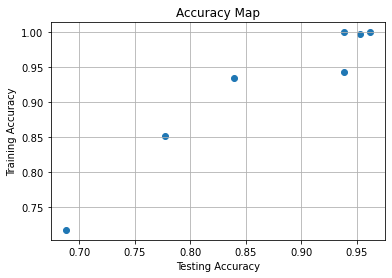

In [261]:
plt.scatter(accuracy_df['Testing_Accuracy'], accuracy_df['Training _Accuracy'])
plt.xlabel("Testing Accuracy")
plt.ylabel("Training Accuracy")
plt.title("Accuracy Map")
plt.grid()
plt.show()

In [262]:
# Choosing a optimal model which is having good Testing and Training Accuracy and is not overfitting

# Exporting Model and Object files

In [263]:
file = open('rf_model_hyp.pkl', 'wb')
pickle.dump(rf_model_hyp, file)
file.close()

In [264]:
columns_list = x.columns
columns_list

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [265]:
file = open('columns_list.obj', 'wb')
pickle.dump(columns_list,file)
file.close()

# Testing Data

In [266]:
df[11:13]

Gender       Age  Height  Weight  family_history_with_overweight  FAVC  \
11       0  0.641058    1.72    80.0                               1     1   
12       1  0.641464    1.65    56.0                               0     0   

    FCVC       NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
11   2.0  4.723647     1      0   2.0    1  2.0  1.0     1       0           2  
12   3.0  4.723647     0      0   3.0    0  2.0  0.0     1       0           0

In [267]:
Gender = 0         # {'Female':0, 'Male':1}
Age = 21
Height = 1.72 
Weight = 80
family_history_with_overweight = 1         # {'yes':1, 'no':0}
FAVC = 1           # {'no':0, 'yes':1}
FCVC = 2
NCP = 3
CAEC = 1           # {'Sometimes':0, 'Frequently':1, 'Always':2, 'no':3}
SMOKE = 0          # {'no':0, 'yes':1}
CH2O = 2
SCC = 1            # {'no':0, 'yes':1}
FAF = 2
TUE = 1
CALC = 1           # {'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}
MTRANS = 0         # {'Public_Transportation':0, 'Walking':1, 'Automobile':2, 'Motorbike':3, 'Bike':4}

### Building Functions

In [268]:
def Gender_encoding(gender):
    
    if gender == 'Female':
        return 0
    else:
        return 1

In [269]:
gender = Gender_encoding(Gender)
gender

1

In [270]:
def Family_history_with_overweight_encoding(family_history_with_overweight):
    
    if family_history_with_overweight == 'no':
        return 0
    else:
        return 1

In [271]:
fam_history = Family_history_with_overweight_encoding('yes')
fam_history

1

In [272]:
def FAVC_encoding(favc):
    
    if favc == 'no':
        return 0
    else:
        return 1

In [273]:
favc = FAVC_encoding('yes')
favc

1

In [274]:
def CAEC_encoding(caec):
    
    if caec == 'Sometimes':
        return 0
    elif caec == 'Frequently':
        return 1
    elif caec == 'Always':
        return 2
    elif caec == 'no':
        return 3

In [275]:
caec = CAEC_encoding('Frequently')
caec

1

In [276]:
def SMOKE_encoding(smoke):
    
    if smoke == 'no':
        return 0
    else:
        return 1

In [277]:
smoke = SMOKE_encoding('no')
smoke

0

In [278]:
def SCC_encoding(scc):
    
    if scc == 'no':
        return 0
    else:
        return 1

In [279]:
ssc = SCC_encoding('yes')
ssc

1

In [280]:
def CALC_encoding(calc):
    
    if calc == 'no':
        return 0
    elif calc == 'Sometimes':
        return 1
    elif calc == 'Frequently':
        return 2
    elif calc == 'Always':
        return 3

In [281]:
calc = CALC_encoding('Sometimes')
calc

1

In [282]:
def MTRANS_encoding(trans):
    
    if trans == 'Public_Transportation':
        return 0
    elif trans == 'Walking':
        return 1
    elif trans == 'Automobile':
        return 2
    elif trans == 'Motorbike':
        return 3
    elif trans == 'Bike':
        return 4

In [283]:
trans = MTRANS_encoding('Public_Transportation')
trans

0

In [284]:
def Age_Transformation(ag):
    
    boxcox_lambda_val_age = -1.5458226415652254
    New = ((ag**boxcox_lambda_val_age) - 1) / boxcox_lambda_val_age
    
    return New

In [285]:
age = Age_Transformation(24)
age

0.6421483419151707

In [286]:
def NCP_Transformation(ncp):
    
    boxcox_lambda_val_NCP = 2.223276247845529
    New = ((ncp**boxcox_lambda_val_NCP) - 1) / boxcox_lambda_val_NCP
   
    return New

In [287]:
ncp = NCP_Transformation(3)
ncp

4.723647478829175

In [288]:
def converter(pred):
    
    if pred == 0:
        return 'Normal_Weight'
    elif pred == 1:
        return 'Overweight_Level_I'
    elif pred == 2:
        return 'Overweight_Level_II'
    elif pred == 3:
        return 'Obesity_Type_I'
    elif pred == 4:
        return 'Insufficient_Weight'
    elif pred == 5:
        return 'Obesity_Type_II'
    elif pred == 6:
        return 'Obesity_Type_III'

In [289]:
columns_list

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [290]:
test_df = pd.DataFrame({'Gender':[gender], 'Age':[age], 'Height':[Height], 'Weight':[Weight],
                        'family_history_with_overweight':[fam_history], 'FAVC':[favc],
                        'FCVC':[FCVC], 'NCP':[ncp], 'CAEC':[caec], 'SMOKE':[smoke], 'CH2O':[2],
                        'SCC':[ssc], 'FAF':[2], 'TUE':[1], 'CALC':[calc], 'MTRANS':[trans]})

test_df

Gender       Age  Height  Weight  family_history_with_overweight  FAVC  \
0       1  0.642148    1.72      80                               1     1   

   FCVC       NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  
0     2  4.723647     1      0     2    1    2    1     1       0

In [291]:
pred = rf_model_hyp.predict(test_df)
prediction = converter(pred)
prediction

'Overweight_Level_II'

### JSON format used in POSTMAN for Testing

In [292]:
# {"Gender":"Male",
# "Age":39,
# "Height":1.79,
# "Weight":90,
# "family_history_with_overweight":"no",
# "Do you eat high caloric food frequently?":"no",
# "Do you usually eat vegetables in your meals?":2,
# "How many main meals do you have daily?":1,
# "Do you eat any food between meals?":"Sometimes",
# "Do you smoke?":"no",
# "How much water do you drink daily?":"2",
# "Do you monitor the calories you eat daily?":"no",
# "How often do you have physical activity?":0,
# "How much time do you spend over cell phone, videogames, television, computer and others?":0,
# "How often do you drink alcohol?":"Sometimes",
# "Which transportation do you usually use?":"Public_Transportation"}

In [ ]:
# {"Gender":"Male",
# "Age":39,
# "Height":1.79,
# "Weight":90,
# "family_history_with_overweight":"no",
# "FAVC":"no",
# "FCVC":2,
# "NCP":1,
# "CAEC":"Sometimes",
# "SMOKE":"no",
# "CH2O":"2",
# "SCC":"no",
# "FAF":0,
# "TUE":0,
# "CALC":"Sometimes",
# "MTRANS":"Public_Transportation"}